# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)

warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest Data  

In [2]:
df = pd.read_excel('World military power.xlsx')

# EDA

In [3]:
df

2020 ranking                     Unnamed: 1                 Airforce Strength               Unnamed: 3                        Unnamed: 4                          Unnamed: 5                        Unnamed: 6                      Unnamed: 7                         Unnamed: 8                               Unnamed: 9                       Unnamed: 10                   Unnamed: 11                       Unnamed: 12                      Unnamed: 13                       Unnamed: 14                             Unnamed: 15                     Land Strength          Unnamed: 17                       Unnamed: 18             Unnamed: 19                        Unnamed: 20                              Unnamed: 21                       Unnamed: 22                     Unnamed: 23                       Unnamed: 24                      Unnamed: 25                     Navy Strength                 Unnamed: 27                       Unnamed: 28  \
0                   Military Strength  Military Strength Power Index                 Aircraft Strength  Aircraft Strength value      Fighter/Interceptor Strength  Fighter/Interceptor Strength value          Attack Aircraft Strength  Attack Aircraft Strength value  Transport Aircraft Fleet Strength  Transport Aircraft Fleet Strength value            Trainer Aircraft Fleet  Trainer Aircraft Fleet value         Helicopter Fleet Strength  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength  Attack Helicopter Fleet Strength value                     Tank Strength  Tank Strength value                  AFV/APC Strength  AFV/APC Strength value  Self-Propelled Artillery Strength  Self-Propelled Artillery Strength value          Towed Artillery Strength  Towed Artillery Strength value         Rocket Projector Strength  Rocket Projector Strength value              Navy Fleet Strengths  Navy Fleet Strengths value   Aircraft Carrier Fleet Strength   
1                         Afghanistan                          1.344                       Afghanistan                  260.000                       Afghanistan                               0.000                       Afghanistan                          25.000                        Afghanistan                                   30.000                       Afghanistan                         0.000                       Afghanistan                          187.000                       Afghanistan                                   0.000                       Afghanistan                0.000                       Afghanistan                1062.000                        Afghanistan                                    0.000                       Afghanistan                         176.000                       Afghanistan                           50.000                       Afghanistan                       0.000                       Afghanistan   
2                             Albania                          2.314                           Albania                   19.000                           Albania                               0.000                           Albania                           0.000                            Albania                                    0.000                           Albania                         0.000                           Albania                           19.000                           Albania                                   0.000                           Albania                0.000                           Albania                 467.000                            Albania                                    0.000                           Albania                           0.000                           Albania                            0.000                           Albania                      38.000                           Albania   
3                             Algeria                          0.466                           Algeria                  551.000                           Algeria

In [4]:
df.columns

Index(['2020 ranking', 'Unnamed: 1', 'Airforce Strength', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Land Strength', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Navy Strength', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Finances', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Logistics', 'Unnamed: 41', 'Natural resources', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Manpower', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Geography', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59'], dtype='object')

In [5]:
df.iloc[0].values.tolist() # columns name are listed. very useful code

['Military Strength',
 'Military Strength Power Index',
 'Aircraft Strength',
 'Aircraft Strength value',
 'Fighter/Interceptor Strength',
 'Fighter/Interceptor Strength value',
 'Attack Aircraft Strength',
 'Attack Aircraft Strength value',
 'Transport Aircraft Fleet Strength',
 'Transport Aircraft Fleet Strength value',
 'Trainer Aircraft Fleet',
 'Trainer Aircraft Fleet value',
 'Helicopter Fleet Strength',
 'Helicopter Fleet Strength value',
 'Attack Helicopter Fleet Strength',
 'Attack Helicopter Fleet Strength value',
 'Tank Strength',
 'Tank Strength value',
 'AFV/APC Strength',
 'AFV/APC Strength value',
 'Self-Propelled Artillery Strength',
 'Self-Propelled Artillery Strength value',
 'Towed Artillery Strength',
 'Towed Artillery Strength value',
 'Rocket Projector Strength',
 'Rocket Projector Strength value',
 'Navy Fleet Strengths',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength',
 'Sub

In [6]:
df.columns = df.iloc[0].values.tolist()  #then attrıbute this code to a variable

In [7]:
df

Military Strength  Military Strength Power Index                 Aircraft Strength  Aircraft Strength value      Fighter/Interceptor Strength  Fighter/Interceptor Strength value          Attack Aircraft Strength  Attack Aircraft Strength value  Transport Aircraft Fleet Strength  Transport Aircraft Fleet Strength value            Trainer Aircraft Fleet  Trainer Aircraft Fleet value         Helicopter Fleet Strength  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength  Attack Helicopter Fleet Strength value                     Tank Strength  Tank Strength value                  AFV/APC Strength  AFV/APC Strength value  Self-Propelled Artillery Strength  Self-Propelled Artillery Strength value          Towed Artillery Strength  Towed Artillery Strength value         Rocket Projector Strength  Rocket Projector Strength value              Navy Fleet Strengths  Navy Fleet Strengths value   Aircraft Carrier Fleet Strength  \
0                   Military Strength  Military Strength Power Index                 Aircraft Strength  Aircraft Strength value      Fighter/Interceptor Strength  Fighter/Interceptor Strength value          Attack Aircraft Strength  Attack Aircraft Strength value  Transport Aircraft Fleet Strength  Transport Aircraft Fleet Strength value            Trainer Aircraft Fleet  Trainer Aircraft Fleet value         Helicopter Fleet Strength  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength  Attack Helicopter Fleet Strength value                     Tank Strength  Tank Strength value                  AFV/APC Strength  AFV/APC Strength value  Self-Propelled Artillery Strength  Self-Propelled Artillery Strength value          Towed Artillery Strength  Towed Artillery Strength value         Rocket Projector Strength  Rocket Projector Strength value              Navy Fleet Strengths  Navy Fleet Strengths value   Aircraft Carrier Fleet Strength   
1                         Afghanistan                          1.344                       Afghanistan                  260.000                       Afghanistan                               0.000                       Afghanistan                          25.000                        Afghanistan                                   30.000                       Afghanistan                         0.000                       Afghanistan                          187.000                       Afghanistan                                   0.000                       Afghanistan                0.000                       Afghanistan                1062.000                        Afghanistan                                    0.000                       Afghanistan                         176.000                       Afghanistan                           50.000                       Afghanistan                       0.000                       Afghanistan   
2                             Albania                          2.314                           Albania                   19.000                           Albania                               0.000                           Albania                           0.000                            Albania                                    0.000                           Albania                         0.000                           Albania                           19.000                           Albania                                   0.000                           Albania                0.000                           Albania                 467.000                            Albania                                    0.000                           Albania                           0.000                           Albania                            0.000                           Albania                      38.000                           Albania   
3                             Algeria                          0.466                           Algeria                  551.000                           Al

In [8]:
df.drop([0], axis=0, inplace=True)  # then the former code is deleted..

In [9]:
df

Military Strength Military Strength Power Index                 Aircraft Strength Aircraft Strength value      Fighter/Interceptor Strength Fighter/Interceptor Strength value          Attack Aircraft Strength Attack Aircraft Strength value Transport Aircraft Fleet Strength Transport Aircraft Fleet Strength value            Trainer Aircraft Fleet Trainer Aircraft Fleet value         Helicopter Fleet Strength Helicopter Fleet Strength value  Attack Helicopter Fleet Strength Attack Helicopter Fleet Strength value                     Tank Strength Tank Strength value                  AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength Self-Propelled Artillery Strength value          Towed Artillery Strength Towed Artillery Strength value         Rocket Projector Strength Rocket Projector Strength value              Navy Fleet Strengths Navy Fleet Strengths value   Aircraft Carrier Fleet Strength Aircraft Carrier Fleet Strength value  \
1                         Afghanistan                         1.344                       Afghanistan                 260.000                       Afghanistan                              0.000                       Afghanistan                         25.000                       Afghanistan                                  30.000                       Afghanistan                        0.000                       Afghanistan                         187.000                       Afghanistan                                  0.000                       Afghanistan               0.000                       Afghanistan               1062.000                       Afghanistan                                   0.000                       Afghanistan                        176.000                       Afghanistan                          50.000                       Afghanistan                      0.000                       Afghanistan                                 0.000   
2                             Albania                         2.314                           Albania                  19.000                           Albania                              0.000                           Albania                          0.000                           Albania                                   0.000                           Albania                        0.000                           Albania                          19.000                           Albania                                  0.000                           Albania               0.000                           Albania                467.000                           Albania                                   0.000                           Albania                          0.000                           Albania                           0.000                           Albania                     38.000                           Albania                                 0.000   
3                             Algeria                         0.466                           Algeria                 551.000                           Algeria                            103.000                           Algeria                         22.000                           Algeria                                  59.000                           Algeria                       87.000                           Algeria                         257.000                           Algeria                                 45.000                           Algeria             880.000                           Algeria               7361.000                           Algeria                                 320.000                           Algeria                        240.000                           Algeria                         316.000                           Algeria                    201.000                           Algeria                                 0.000   
4                              Angola                         0.838 

In [10]:
df.info()  # all the values are "object"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1 to 138
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength                        138 non-null    object
 3   Aircraft Strength value                  138 non-null    object
 4   Fighter/Interceptor Strength             138 non-null    object
 5   Fighter/Interceptor Strength value       138 non-null    object
 6   Attack Aircraft Strength                 138 non-null    object
 7   Attack Aircraft Strength value           138 non-null    object
 8   Transport Aircraft Fleet Strength        138 non-null    object
 9   Transport Aircraft Fleet Strength value  138 non-null    object
 10  Trainer Aircraft Fleet                   138 non-null    objec

## Implement basic steps to see how is your data looks like

In [11]:
df.head()

Military Strength Military Strength Power Index Aircraft Strength Aircraft Strength value Fighter/Interceptor Strength Fighter/Interceptor Strength value Attack Aircraft Strength Attack Aircraft Strength value Transport Aircraft Fleet Strength Transport Aircraft Fleet Strength value Trainer Aircraft Fleet Trainer Aircraft Fleet value Helicopter Fleet Strength Helicopter Fleet Strength value Attack Helicopter Fleet Strength Attack Helicopter Fleet Strength value Tank Strength Tank Strength value AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength Self-Propelled Artillery Strength value Towed Artillery Strength Towed Artillery Strength value Rocket Projector Strength Rocket Projector Strength value Navy Fleet Strengths Navy Fleet Strengths value Aircraft Carrier Fleet Strength Aircraft Carrier Fleet Strength value Submarine Fleet Strength Submarine Fleet Strength value Destroyer Fleet Strength Destroyer Fleet Strength value Frigate Fleet Strength  \
1       Afghanistan                         1.344       Afghanistan                 260.000                  Afghanistan                              0.000              Afghanistan                         25.000                       Afghanistan                                  30.000            Afghanistan                        0.000               Afghanistan                         187.000                      Afghanistan                                  0.000   Afghanistan               0.000      Afghanistan               1062.000                       Afghanistan                                   0.000              Afghanistan                        176.000               Afghanistan                          50.000          Afghanistan                      0.000                     Afghanistan                                 0.000              Afghanistan                          0.000              Afghanistan                          0.000            Afghanistan   
2           Albania                         2.314           Albania                  19.000                      Albania                              0.000                  Albania                          0.000                           Albania                                   0.000                Albania                        0.000                   Albania                          19.000                          Albania                                  0.000       Albania               0.000          Albania                467.000                           Albania                                   0.000                  Albania                          0.000                   Albania                           0.000              Albania                     38.000                         Albania                                 0.000                  Albania                          0.000                  Albania                          0.000                Albania   
3           Algeria                         0.466           Algeria                 551.000                      Algeria                            103.000                  Algeria                         22.000                           Algeria                                  59.000                Algeria                       87.000                   Algeria                         257.000                          Algeria                                 45.000       Algeria             880.000          Algeria               7361.000                           Algeria                                 320.000                  Algeria                        240.000                   Algeria                         316.000              Algeria                    201.000                         Algeria                                 0.000                  Algeria                          6.000                  Algeria                          0.000                Algeria   
4            Angola                         0.838         

In [12]:
df.describe().T

count  unique             top    freq
Military Strength                           138     138     Afghanistan       1
Military Strength Power Index           138.000 138.000           1.344   1.000
Aircraft Strength                           138     138     Afghanistan       1
Aircraft Strength value                 138.000 113.000          19.000   5.000
Fighter/Interceptor Strength                138     138     Afghanistan       1
Fighter/Interceptor Strength value      138.000  63.000           0.000  46.000
Attack Aircraft Strength                    138     138     Afghanistan       1
Attack Aircraft Strength value          138.000  38.000           0.000  75.000
Transport Aircraft Fleet Strength           138     138     Afghanistan       1
Transport Aircraft Fleet Strength value 138.000  49.000           0.000  15.000
Trainer Aircraft Fleet                      138     138     Afghanistan       1
Trainer Aircraft Fleet value            138.000  77.000           0.000  25.000
Helicopter Fleet Strength                   138     138     Afghanistan       1
Helicopter Fleet Strength value         138.000  97.000           5.000   4.000
Attack Helicopter Fleet Strength            138     138     Afghanistan       1
Attack Helicopter Fleet Strength value  138.000  45.000           0.000  63.000
Tank Strength                               138     138     Afghanistan       1
Tank Strength value                     138.000 106.000           0.000  24.000
AFV/APC Strength                            138     138     Afghanistan       1
AFV/APC Strength value                  138.000 130.000        2000.000   4.000
Self-Propelled Artillery Strength           138     138     Afghanistan       1
Self-Propelled Artillery Strength value 138.000  70.000           0.000  52.000
Towed Artillery Strength                    138     138     Afghanistan       1
Towed Artillery Strength value          138.000  91.000           0.000  24.000
Rocket Projector Strength                   138     138     Afghanistan       1
Rocket Projector Strength value         138.000  68.000           0.000  46.000
Navy Fleet Strengths                        124     124     Afghanistan       1
Navy Fleet Strengths value              124.000  78.000           0.000  14.000
Aircraft Carrier Fleet Strength             115     115     Afghanistan       1
Aircraft Carrier Fleet Strength value   115.000   5.000           0.000 102.000
Submarine Fleet Strength                    115     115     Afghanistan       1
Submarine Fleet Strength value          115.000  20.000           0.000  74.000
Destroyer Fleet Strength                    115     115     Afghanistan       1
Destroyer Fleet Strength value          115.000  11.000           0.000 103.000
Frigate Fleet Strength                      115     115     Afghanistan       1
Frigate Fleet Strength value            115.000  18.000           0.000  61.000
defense spending budget                     138     138     Afghanistan       1
defense spending budget value               138     124  2,50,00,00,000       3
External Debt                               138     138     Afghanistan       1
External Debt value                         138     138  2,84,00,00,000       1
Airport Totals                              138     138     Afghanistan       1
Airport Totals value                    138.000 108.000          18.000   3.000
Oil Production                              138     138     Afghanistan       1
Oil Production value                    138.000  88.000           0.000  46.000
Oil Consumption                             138     138     Afghanistan       1
Oil Consumption value                   138.000 102.000       18500.000   4.000
Proven Oil Reserves                         138     138     Afghanistan       1
Proven Oil Reserves value               138.000  84.000           0.000  46.000
Available Manpower                          138     138     Afghanistan       1
Available Manpower value                  

## Convert multi index columns to one level

In [13]:
df.columns

Index(['Military Strength', 'Military Strength Power Index', 'Aircraft Strength', 'Aircraft Strength value', 'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value', 'Attack Aircraft Strength', 'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength', 'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet', 'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength', 'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength', 'Attack Helicopter Fleet Strength value', 'Tank Strength', 'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value', 'Self-Propelled Artillery Strength', 'Self-Propelled Artillery Strength value', 'Towed Artillery Strength', 'Towed Artillery Strength value', 'Rocket Projector Strength', 'Rocket Projector Strength value', 'Navy Fleet Strengths', 'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength', 'Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength',
       'Submarine Fleet Stren

In [14]:
df1=df.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28]] #is not a good method....
df1

Military Strength                 Aircraft Strength      Fighter/Interceptor Strength          Attack Aircraft Strength Transport Aircraft Fleet Strength            Trainer Aircraft Fleet         Helicopter Fleet Strength  Attack Helicopter Fleet Strength                     Tank Strength                  AFV/APC Strength Self-Propelled Artillery Strength          Towed Artillery Strength         Rocket Projector Strength              Navy Fleet Strengths   Aircraft Carrier Fleet Strength
1                         Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan
2                             Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania
3                             Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria
4                              Angola                            Angola                            Angola                            Angola                            Angola                            Angola                            Angola                            Angola                            Angola                            Angola                            Angola                            Angola                            Angola                            Angola                            Angola
5                           Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina                         Argentina
6                             Armenia                           Armenia                           Armenia                           Armenia                           Armenia                           Armenia                           Armenia                           Armenia                           Armenia                           Armenia                           Armenia                           Armenia                           Armenia                           Armenia                               NaN
7                           Australia                         Australia                         Australia                         Australia                         Australia                         Australia                         Australia                         Australia                         Australia                         Australia                         Australia                         Australia           

In [15]:
df.iloc[:,::2]  # smart method compare to before....

Military Strength                 Aircraft Strength      Fighter/Interceptor Strength          Attack Aircraft Strength Transport Aircraft Fleet Strength            Trainer Aircraft Fleet         Helicopter Fleet Strength  Attack Helicopter Fleet Strength                     Tank Strength                  AFV/APC Strength Self-Propelled Artillery Strength          Towed Artillery Strength         Rocket Projector Strength              Navy Fleet Strengths   Aircraft Carrier Fleet Strength          Submarine Fleet Strength          Destroyer Fleet Strength            Frigate Fleet Strength           defense spending budget                     External Debt                    Airport Totals                    Oil Production                   Oil Consumption               Proven Oil Reserves                Available Manpower                  Total Population            Total Square Land Area          Total Coastline Coverage           Total Waterway Coverage  \
1                         Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan                       Afghanistan   
2                             Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania                           Albania   
3                             Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria                           Algeria   
4                              Angola           

In [16]:
#list = df.loc[0].tolist()    # brief and efective code. 
#list

#df.set_axis(list, axis='columns', inplace=True) 

#df.drop(0, axis=0, inplace=True)



In [17]:
[i[0] for i in df.columns.str.findall(".*value") if i !=[]] # what does this code? ıt finds the column name includes "value"

['Aircraft Strength value',
 'Fighter/Interceptor Strength value',
 'Attack Aircraft Strength value',
 'Transport Aircraft Fleet Strength value',
 'Trainer Aircraft Fleet value',
 'Helicopter Fleet Strength value',
 'Attack Helicopter Fleet Strength value',
 'Tank Strength value',
 'AFV/APC Strength value',
 'Self-Propelled Artillery Strength value',
 'Towed Artillery Strength value',
 'Rocket Projector Strength value',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'defense spending budget value',
 'External Debt value',
 'Airport Totals value',
 'Oil Production value',
 'Oil Consumption value',
 'Proven Oil Reserves value',
 'Available Manpower value',
 'Total Population value',
 'Total Square Land Area value',
 'Total Coastline Coverage value',
 'Total Waterway Coverage value',
 'Total Border Coverage value']

In [18]:
 for i in range(df.shape[0]):   # I saw the column values repeated. decıded to contınue one column.
    print(set(df.iloc[i,::2]))  

{'Afghanistan'}
{'Albania'}
{'Algeria'}
{'Angola'}
{'Argentina'}
{nan, 'Armenia'}
{nan, 'Australia'}
{nan, 'Austria'}
{'Azerbaijan'}
{nan, 'Bahrain'}
{'Bangladesh'}
{nan, 'Belarus'}
{'Belgium'}
{nan, 'Bhutan'}
{nan, 'Bolivia'}
{'Bosnia and Herzegovina'}
{nan, 'Botswana'}
{'Brazil'}
{'Bulgaria'}
{'Burkina Faso', nan}
{'Cambodia'}
{'Cameroon'}
{'Canada'}
{'Central African Republic', nan}
{nan, 'Chad'}
{'Chile'}
{'China'}
{'Colombia'}
{'Croatia'}
{'Cuba'}
{nan, 'Czechia'}
{'Democratic Republic of the Congo'}
{'Denmark'}
{'Dominican Republic'}
{'Ecuador'}
{'Egypt'}
{'El Salvador'}
{'Estonia'}
{nan, 'Ethiopia'}
{'Finland'}
{'France'}
{'Gabon'}
{'Georgia'}
{'Germany'}
{'Ghana'}
{'Greece'}
{'Guatemala'}
{'Honduras'}
{nan, 'Hungary'}
{'India'}
{'Indonesia'}
{'Iran'}
{'Iraq'}
{'Ireland'}
{'Israel'}
{'Italy'}
{'Ivory Coast'}
{nan, 'Japan'}
{'Jordan'}
{'Kazakhstan'}
{'Kenya'}
{'Kuwait'}
{nan, 'Kyrgyzstan'}
{nan, 'Laos'}
{'Latvia'}
{'Lebanon'}
{'Liberia'}
{'Libya'}
{'Lithuania'}
{nan, 'Madagascar'

In [19]:
columns_new=[df.columns[i] for i in range(len(df.columns)) if i%2!=0] # then kicked out the trash columns.
columns_new

['Military Strength Power Index',
 'Aircraft Strength value',
 'Fighter/Interceptor Strength value',
 'Attack Aircraft Strength value',
 'Transport Aircraft Fleet Strength value',
 'Trainer Aircraft Fleet value',
 'Helicopter Fleet Strength value',
 'Attack Helicopter Fleet Strength value',
 'Tank Strength value',
 'AFV/APC Strength value',
 'Self-Propelled Artillery Strength value',
 'Towed Artillery Strength value',
 'Rocket Projector Strength value',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'defense spending budget value',
 'External Debt value',
 'Airport Totals value',
 'Oil Production value',
 'Oil Consumption value',
 'Proven Oil Reserves value',
 'Available Manpower value',
 'Total Population value',
 'Total Square Land Area value',
 'Total Coastline Coverage value',
 'Total Waterway Coverage value',
 'Total Border Coverage value']

## Detect and drop duplicated columns

In [20]:
df[columns_new]  

Military Strength Power Index Aircraft Strength value Fighter/Interceptor Strength value Attack Aircraft Strength value Transport Aircraft Fleet Strength value Trainer Aircraft Fleet value Helicopter Fleet Strength value Attack Helicopter Fleet Strength value Tank Strength value AFV/APC Strength value Self-Propelled Artillery Strength value Towed Artillery Strength value Rocket Projector Strength value Navy Fleet Strengths value Aircraft Carrier Fleet Strength value Submarine Fleet Strength value Destroyer Fleet Strength value Frigate Fleet Strength value defense spending budget value   External Debt value Airport Totals value Oil Production value Oil Consumption value Proven Oil Reserves value Available Manpower value Total Population value Total Square Land Area value Total Coastline Coverage value Total Waterway Coverage value Total Border Coverage value
1                           1.344                 260.000                              0.000                         25.000                                  30.000                        0.000                         187.000                                  0.000               0.000               1062.000                                   0.000                        176.000                          50.000                      0.000                                 0.000                          0.000                          0.000                        0.000               12,00,00,00,000        2,84,00,00,000               43.000                0.000              5500.000                     0.000              1,43,25,743            3,49,40,837                     6,52,230                          0.000                      1200.000                    5987.000
2                           2.314                  19.000                              0.000                          0.000                                   0.000                        0.000                          19.000                                  0.000               0.000                467.000                                   0.000                          0.000                           0.000                     38.000                                 0.000                          0.000                          0.000                        0.000                  25,00,00,000        9,50,50,00,000                4.000            16000.000             42500.000              16,83,00,000                15,19,438              30,57,220                    28748.000                        362.000                        41.000                     691.000
3                           0.466                 551.000                            103.000                         22.000                                  59.000                       87.000                         257.000                                 45.000             880.000               7361.000                                 320.000                        240.000                         316.000                    201.000                                 0.000                          6.000                          0.000                        5.000               13,00,00,00,000        6,26,00,00,000              157.000            13,06,000              3,25,000           12,20,00,00,000              2,07,41,263            4,16,57,488                    23,81,741                        998.000                         0.000                    6734.000
4                           0.838                 295.000                             72.000                         18.000                                  30.000                       47.000                         126.000                                 15.000             379.000                595.000                                  28.000                        357.000                         115.000                     57.000                                 0.000                          0.000   

In [21]:
df.iloc[:,[0]]    #  there is no null values.

Military Strength
1                         Afghanistan
2                             Albania
3                             Algeria
4                              Angola
5                           Argentina
6                             Armenia
7                           Australia
8                             Austria
9                          Azerbaijan
10                            Bahrain
11                         Bangladesh
12                            Belarus
13                            Belgium
14                             Bhutan
15                            Bolivia
16             Bosnia and Herzegovina
17                           Botswana
18                             Brazil
19                           Bulgaria
20                       Burkina Faso
21                           Cambodia
22                           Cameroon
23                             Canada
24           Central African Republic
25                               Chad
26                              Chile
27                              China
28                           Colombia
29                            Croatia
30                               Cuba
31                            Czechia
32   Democratic Republic of the Congo
33                            Denmark
34                 Dominican Republic
35                            Ecuador
36                              Egypt
37                        El Salvador
38                            Estonia
39                           Ethiopia
40                            Finland
41                             France
42                              Gabon
43                            Georgia
44                            Germany
45                              Ghana
46                             Greece
47                          Guatemala
48                           Honduras
49                            Hungary
50                              India
51                          Indonesia
52                               Iran
53                               Iraq
54                            Ireland
55                             Israel
56                              Italy
57                        Ivory Coast
58                              Japan
59                             Jordan
60                         Kazakhstan
61                              Kenya
62                             Kuwait
63                         Kyrgyzstan
64                               Laos
65                             Latvia
66                            Lebanon
67                            Liberia
68                              Libya
69                          Lithuania
70                         Madagascar
71                           Malaysia
72                               Mali
73                         Mauritania
74                             Mexico
75                            Moldova
76                           Mongolia
77                         Montenegro
78                            Morocco
79                         Mozambique
80                            Myanmar
81                            Namibia
82                              Nepal
83                        Netherlands
84                        New Zealand
85                          Nicaragua
86                              Niger
87                            Nigeria
88                        North Korea
89                    North Macedonia
90                             Norway
91                               Oman
92                           Pakistan
93                             Panama
94                           Paraguay
95                               Peru
96                        Philippines
97                             Poland
98                           Portugal
99                              Qatar
100             Republic of the Congo
101                           Romania
102                            Russia
103                      Saudi Arabia
104                            Serbia
105                      Sierr

In [22]:
df=pd.concat([df.iloc[:,[0]],df[columns_new]],axis=1)
df

Military Strength Military Strength Power Index Aircraft Strength value Fighter/Interceptor Strength value Attack Aircraft Strength value Transport Aircraft Fleet Strength value Trainer Aircraft Fleet value Helicopter Fleet Strength value Attack Helicopter Fleet Strength value Tank Strength value AFV/APC Strength value Self-Propelled Artillery Strength value Towed Artillery Strength value Rocket Projector Strength value Navy Fleet Strengths value Aircraft Carrier Fleet Strength value Submarine Fleet Strength value Destroyer Fleet Strength value Frigate Fleet Strength value defense spending budget value   External Debt value Airport Totals value Oil Production value Oil Consumption value Proven Oil Reserves value Available Manpower value Total Population value Total Square Land Area value Total Coastline Coverage value Total Waterway Coverage value Total Border Coverage value
1                         Afghanistan                         1.344                 260.000                              0.000                         25.000                                  30.000                        0.000                         187.000                                  0.000               0.000               1062.000                                   0.000                        176.000                          50.000                      0.000                                 0.000                          0.000                          0.000                        0.000               12,00,00,00,000        2,84,00,00,000               43.000                0.000              5500.000                     0.000              1,43,25,743            3,49,40,837                     6,52,230                          0.000                      1200.000                    5987.000
2                             Albania                         2.314                  19.000                              0.000                          0.000                                   0.000                        0.000                          19.000                                  0.000               0.000                467.000                                   0.000                          0.000                           0.000                     38.000                                 0.000                          0.000                          0.000                        0.000                  25,00,00,000        9,50,50,00,000                4.000            16000.000             42500.000              16,83,00,000                15,19,438              30,57,220                    28748.000                        362.000                        41.000                     691.000
3                             Algeria                         0.466                 551.000                            103.000                         22.000                                  59.000                       87.000                         257.000                                 45.000             880.000               7361.000                                 320.000                        240.000                         316.000                    201.000                                 0.000                          6.000                          0.000                        5.000               13,00,00,00,000        6,26,00,00,000              157.000            13,06,000              3,25,000           12,20,00,00,000              2,07,41,263            4,16,57,488                    23,81,741                        998.000                         0.000                    6734.000
4                              Angola                         0.838                 295.000                             72.000                         18.000                                  30.000                       47.000                         126.000                                 15.000             379.000                595.000                                  28.000        

In [23]:
df.reset_index(drop=True,inplace=True) # ı like this code..reset index... It reindex the confused  data and prevents me from making mistakes.

In [24]:
df.rename(columns={"Military Strength":"Country"},inplace=True)  # this name ("Military Strength") is very confusing..but "country"  is clear..

## Check for missing values 

In [25]:
df.isna().sum().any()

True

In [26]:
df.isnull().sum().sort_values(ascending=False)  # OOOO happy end...Thank God for clearing..

Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value    

In [27]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

Missing_Number  Missing_Percent
Total Coastline Coverage value                       29            0.210
Aircraft Carrier Fleet Strength value                23            0.167
Frigate Fleet Strength value                         23            0.167
Destroyer Fleet Strength value                       23            0.167
Submarine Fleet Strength value                       23            0.167
Navy Fleet Strengths value                           14            0.101
Total Border Coverage value                           9            0.065
Helicopter Fleet Strength value                       0            0.000
Attack Helicopter Fleet Strength value                0            0.000
Total Waterway Coverage value                         0            0.000
Aircraft Strength value                               0            0.000
Total Square Land Area value                          0            0.000
Total Population value                                0            0.000
Available Manpower value                              0            0.000
Proven Oil Reserves value                             0            0.000
Oil Consumption value                                 0            0.000
Oil Production value                                  0            0.000
Airport Totals value                                  0            0.000
External Debt value                                   0            0.000
defense spending budget value                         0            0.000
Fighter/Interceptor Strength value                    0            0.000
Attack Aircraft Strength value                        0            0.000
Transport Aircraft Fleet Strength value               0            0.000
Military Strength Power Index                         0            0.000
Trainer Aircraft Fleet value                          0            0.000
Rocket Projector Strength value                       0            0.000
Towed Artillery Strength value                        0            0.000
Self-Propelled Artillery Strength value               0            0.000
AFV/APC Strength value                                0            0.000
Tank Strength value                                   0            0.000
Country                                               0            0.000

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

<Figure size 288x432 with 0 Axes>

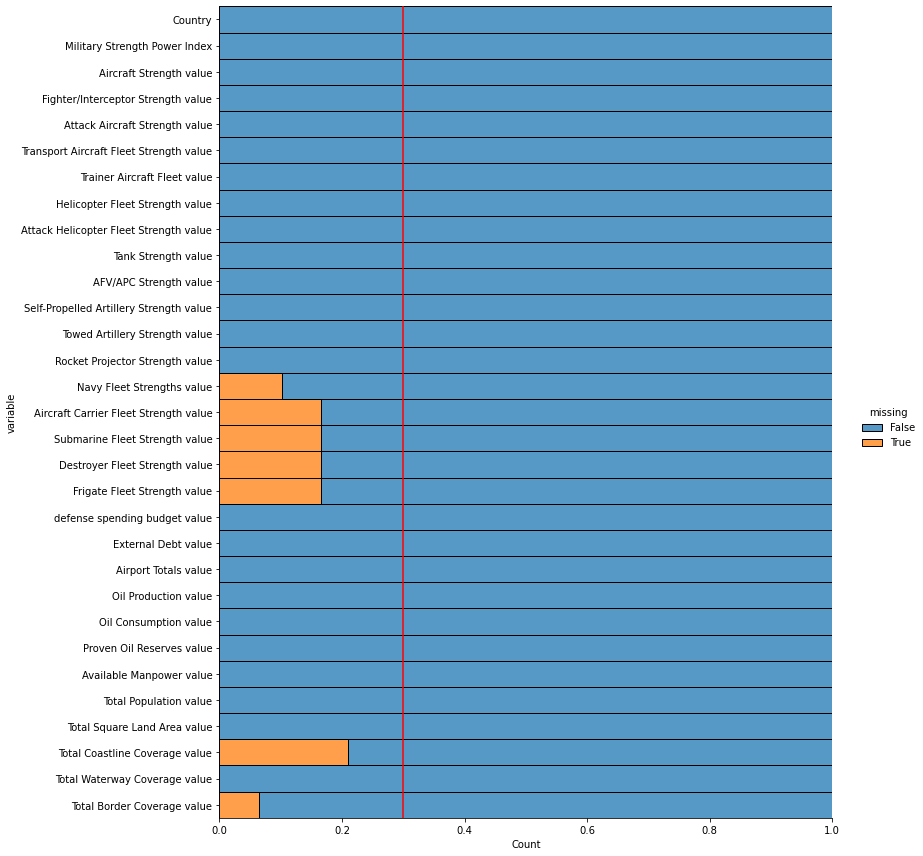

In [28]:
plt.figure(figsize=(4,6))
sns.displot(
            data=df.isnull().melt(value_name="missing"),
            y="variable",
            hue="missing",
            multiple="fill",
            height=12
)
plt.axvline(0.3,color="r");

In [29]:
df.isnull().sum().sort_values(ascending=False).sum()

144

In [30]:
# Null percentages of each features
df.isnull().sum()*100/df.shape[0]  #ıts my one of favourites code..

Country                                    0.000
Military Strength Power Index              0.000
Aircraft Strength value                    0.000
Fighter/Interceptor Strength value         0.000
Attack Aircraft Strength value             0.000
Transport Aircraft Fleet Strength value    0.000
Trainer Aircraft Fleet value               0.000
Helicopter Fleet Strength value            0.000
Attack Helicopter Fleet Strength value     0.000
Tank Strength value                        0.000
AFV/APC Strength value                     0.000
Self-Propelled Artillery Strength value    0.000
Towed Artillery Strength value             0.000
Rocket Projector Strength value            0.000
Navy Fleet Strengths value                10.145
Aircraft Carrier Fleet Strength value     16.667
Submarine Fleet Strength value            16.667
Destroyer Fleet Strength value            16.667
Frigate Fleet Strength value              16.667
defense spending budget value              0.000
External Debt value 

In [31]:
for i in range(df.shape[0]):
   if df.iloc[i, ].isnull().sum()!=0: 
       print(f"Number of null values in row {i} : " + str(df.iloc[i, ].isnull().sum()))   # lets try to fulfill the missing values..

Number of null values in row 5 : 5
Number of null values in row 6 : 1
Number of null values in row 7 : 5
Number of null values in row 9 : 1
Number of null values in row 11 : 5
Number of null values in row 13 : 5
Number of null values in row 14 : 1
Number of null values in row 16 : 6
Number of null values in row 19 : 6
Number of null values in row 23 : 6
Number of null values in row 24 : 6
Number of null values in row 30 : 6
Number of null values in row 38 : 6
Number of null values in row 48 : 6
Number of null values in row 57 : 1
Number of null values in row 62 : 6
Number of null values in row 63 : 1
Number of null values in row 69 : 1
Number of null values in row 71 : 6
Number of null values in row 74 : 6
Number of null values in row 75 : 6
Number of null values in row 81 : 6
Number of null values in row 83 : 1
Number of null values in row 85 : 6
Number of null values in row 88 : 6
Number of null values in row 93 : 1
Number of null values in row 95 : 1
Number of null values in row 103

In [32]:
df.iloc[5, ]

Country                                            Armenia
Military Strength Power Index                        2.125
Aircraft Strength value                             64.000
Fighter/Interceptor Strength value                   0.000
Attack Aircraft Strength value                       9.000
Transport Aircraft Fleet Strength value              3.000
Trainer Aircraft Fleet value                        13.000
Helicopter Fleet Strength value                     37.000
Attack Helicopter Fleet Strength value              20.000
Tank Strength value                                110.000
AFV/APC Strength value                             748.000
Self-Propelled Artillery Strength value             38.000
Towed Artillery Strength value                     150.000
Rocket Projector Strength value                     68.000
Navy Fleet Strengths value                           0.000
Aircraft Carrier Fleet Strength value                  NaN
Submarine Fleet Strength value                         N

In [33]:
df.isnull().sum() # to the countries have no borders to sea of course no need to  "submarine fleet" . only south korea's data should be filled..

Country                                     0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

In [34]:
# we check missing values with Country Geograpy for Navy 

df.loc[df["Total Coastline Coverage value"].isnull(), [             'Country',
                                                                    'Navy Fleet Strengths value',
                                                                    'Aircraft Carrier Fleet Strength value',
                                                                    'Submarine Fleet Strength value',
                                                                    'Destroyer Fleet Strength value',
                                                                    'Frigate Fleet Strength value',
                                                                    'Total Waterway Coverage value']]

Country Navy Fleet Strengths value Aircraft Carrier Fleet Strength value Submarine Fleet Strength value Destroyer Fleet Strength value Frigate Fleet Strength value Total Waterway Coverage value
5                     Armenia                      0.000                                   NaN                            NaN                            NaN                          NaN                         0.000
7                     Austria                      0.000                                   NaN                            NaN                            NaN                          NaN                         0.000
11                    Belarus                      0.000                                   NaN                            NaN                            NaN                          NaN                      2500.000
13                     Bhutan                      0.000                                   NaN                            NaN                            NaN                          NaN                         0.000
14                    Bolivia                    173.000                                 0.000                          0.000                          0.000                        0.000                     10000.000
16                   Botswana                        NaN                                   NaN                            NaN                            NaN                          NaN                         0.000
19               Burkina Faso                        NaN                                   NaN                            NaN                            NaN                          NaN                         0.000
23   Central African Republic                        NaN                                   NaN                            NaN                            NaN                          NaN                      2800.000
24                       Chad                        NaN                                   NaN                            NaN                            NaN                          NaN                         0.000
30                    Czechia                        NaN                                   NaN                            NaN                            NaN                          NaN                       664.000
38                   Ethiopia                        NaN                                   NaN                            NaN                            NaN                          NaN                      1,04,300
48                    Hungary                        NaN                                   NaN                            NaN                            NaN                          NaN                      1622.000
62                 Kyrgyzstan                        NaN                                   NaN                            NaN                            NaN                          NaN                       600.000
63                       Laos                     36.000                                 0.000                          0.000                          0.000                        0.000                      4600.000
71                       Mali                        NaN                                   NaN                            NaN                            NaN                          NaN                         0.000
74                    Moldova                        NaN                                   NaN                            NaN                            NaN                          NaN                       558.000
75                   Mongolia                        NaN                                   NaN                            NaN                            NaN                          NaN                       580.000
81                      Nepal                        NaN                                   NaN                            NaN         

In [35]:
# Change zero "0"  missing values, 
df.loc[df["Total Coastline Coverage value"].isnull(),
    
    ['Navy Fleet Strengths value',
     'Aircraft Carrier Fleet Strength value',
     'Submarine Fleet Strength value',
     'Destroyer Fleet Strength value',
     'Frigate Fleet Strength value']
    
    ] = 0

In [36]:
# missing(df)

In [37]:
df.loc[df['Aircraft Carrier Fleet Strength value'].isnull()|
             df['Submarine Fleet Strength value'].isnull()|
             df['Destroyer Fleet Strength value'].isnull()|
             df['Frigate Fleet Strength value'].isnull()  |
             df['Navy Fleet Strengths value'].isnull()] 

Country Military Strength Power Index Aircraft Strength value Fighter/Interceptor Strength value Attack Aircraft Strength value Transport Aircraft Fleet Strength value Trainer Aircraft Fleet value Helicopter Fleet Strength value Attack Helicopter Fleet Strength value Tank Strength value AFV/APC Strength value Self-Propelled Artillery Strength value Towed Artillery Strength value Rocket Projector Strength value Navy Fleet Strengths value Aircraft Carrier Fleet Strength value Submarine Fleet Strength value Destroyer Fleet Strength value Frigate Fleet Strength value defense spending budget value External Debt value Airport Totals value Oil Production value Oil Consumption value Proven Oil Reserves value Available Manpower value Total Population value Total Square Land Area value Total Coastline Coverage value Total Waterway Coverage value Total Border Coverage value
110  South Korea                         0.151                1649.000                            414.000                         71.000                                  41.000                      298.000                         803.000                                112.000            2614.000              14000.000                                3040.000                       3854.000                         575.000                    234.000                                   NaN                            NaN                            NaN                          NaN               44,00,00,00,000   3,84,60,00,00,000              111.000                0.000             28,00,000                     0.000              2,57,09,049            5,14,18,097                    99720.000                       2413.000                      1600.000                     237.000
132   Uzbekistan                         0.809                 185.000                             66.000                         20.000                                  18.000                        2.000                          79.000                                 25.000             420.000               1215.000                                 137.000                          0.000                          98.000                      0.000                                   NaN                            NaN                            NaN                          NaN                  97,50,00,000     16,90,00,00,000               53.000            46070.000              1,42,000              59,40,00,000              1,59,12,566            3,00,23,709                     4,47,400                        420.000                      1100.000                    6893.000

In [38]:
df.loc[df["Country"]=="Uzbekistan",
            ['Navy Fleet Strengths value',
             'Aircraft Carrier Fleet Strength value',
             'Submarine Fleet Strength value',
             'Destroyer Fleet Strength value',
             'Frigate Fleet Strength value',
           ]]

Navy Fleet Strengths value Aircraft Carrier Fleet Strength value Submarine Fleet Strength value Destroyer Fleet Strength value Frigate Fleet Strength value
132                      0.000                                   NaN                            NaN                            NaN                          NaN

In [39]:
# Uzbekistan has not navy 
df.loc[df["Country"] == "Uzbekistan",
            ['Navy Fleet Strengths value',
             'Aircraft Carrier Fleet Strength value',
             'Submarine Fleet Strength value',
             'Destroyer Fleet Strength value',
             'Frigate Fleet Strength value',
           ]] = 0

In [40]:
# Sout Korea have navy force but there are some missing values
df.loc[df["Country"] == "South Korea",
            ['Navy Fleet Strengths value',
             'Aircraft Carrier Fleet Strength value',
             'Submarine Fleet Strength value',
             'Destroyer Fleet Strength value',
             'Frigate Fleet Strength value',
           ]]

Navy Fleet Strengths value Aircraft Carrier Fleet Strength value Submarine Fleet Strength value Destroyer Fleet Strength value Frigate Fleet Strength value
110                    234.000                                   NaN                            NaN                            NaN                          NaN

In [41]:
# South Korea Navy wikipeida page
df.loc[(df['Country']=="South Korea") & (df['Submarine Fleet Strength value'].isnull()), 'Submarine Fleet Strength value'] = 22
df.loc[(df['Country']=="South Korea") & (df['Frigate Fleet Strength value'].isnull()), 'Frigate Fleet Strength value'] = 4
df.loc[(df['Country']=="South Korea") & (df['Destroyer Fleet Strength value'].isnull()), 'Destroyer Fleet Strength value'] = 12

In [42]:
df.fillna(0, inplace=True)

In [43]:
#missing(df)    # no missing value remained

In [44]:
df.reset_index(drop=True,inplace=True)

## Fix the dtypes

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [46]:
df.select_dtypes("object")

Country defense spending budget value   External Debt value Oil Production value Oil Consumption value Proven Oil Reserves value Available Manpower value Total Population value Total Square Land Area value Total Coastline Coverage value Total Waterway Coverage value
0                         Afghanistan               12,00,00,00,000        2,84,00,00,000                0.000              5500.000                     0.000              1,43,25,743            3,49,40,837                     6,52,230                          0.000                      1200.000
1                             Albania                  25,00,00,000        9,50,50,00,000            16000.000             42500.000              16,83,00,000                15,19,438              30,57,220                    28748.000                        362.000                        41.000
2                             Algeria               13,00,00,00,000        6,26,00,00,000            13,06,000              3,25,000           12,20,00,00,000              2,07,41,263            4,16,57,488                    23,81,741                        998.000                         0.000
3                              Angola                7,00,00,00,000       42,08,00,00,000            16,66,000             82300.000            8,27,30,00,000                62,44,205            3,03,55,880                    12,46,700                       1600.000                      1300.000
4                           Argentina                4,20,00,00,000     2,14,90,00,00,000             4,79,400              6,85,000            2,18,50,00,000              2,01,79,430            4,46,94,198                    27,80,400                       4989.000                     11000.000
5                             Armenia                1,38,50,00,000       10,41,00,00,000                0.000             47500.000                     0.000                16,96,085              30,38,217                    29743.000                              0                         0.000
6                           Australia               26,30,00,00,000    17,14,00,00,00,000             2,63,000             10,05,000            1,82,10,00,000              1,08,08,002            2,34,70,145                    77,41,220                      25760.000                      2000.000
7                             Austria                3,38,00,00,000     6,30,80,00,00,000            14260.000              2,15,000               4,30,00,000                40,17,691              87,93,370                    83871.000                              0                         0.000
8                          Azerbaijan                2,80,50,00,000       17,41,00,00,000             7,89,300              1,80,000            7,00,00,00,000                50,42,346            1,00,46,516                    86600.000                        713.000                         0.000
9                             Bahrain                1,41,50,00,000       52,15,00,00,000            45000.000             55000.000              12,46,00,000                 8,06,505              14,22,659                      760.000                        161.000                         0.000
10                         Bangladesh                3,80,00,00,000       50,26,00,00,000             3666.000              1,12,000               2,80,00,000              7,89,13,289           15,94,53,001                     1,43,998                        580.000                      8370.000
11                            Belarus                  62,37,02,800       39,92,00,00,000            32000.000              1,90,000              19,80,00,000                49,82,905              95,27,543                     2,07,600                              0                      2500.000
12                            Belgium                4,92,10,00,000    12,81,00,00,00,000                0.000              6,45,000                     0.000           

In [47]:
df.select_dtypes("object").columns # there is problem in object columns. first they should be cleared then converted to float.

Index(['Country', 'defense spending budget value', 'External Debt value', 'Oil Production value', 'Oil Consumption value', 'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage value', 'Total Waterway Coverage value'], dtype='object')

In [48]:
for col in df.select_dtypes("object").columns[1:]: # firstly, this code  cleares then convertes to float.
    df[col]  = df[col].astype("str")
    df[col]  = df[col].str.replace(',','')
    df[col]  = df[col].astype("float")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [50]:
df.describe()

Military Strength Power Index  Aircraft Strength value  Fighter/Interceptor Strength value  Attack Aircraft Strength value  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  Tank Strength value  AFV/APC Strength value  Self-Propelled Artillery Strength value  Towed Artillery Strength value  Rocket Projector Strength value  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  Destroyer Fleet Strength value  Frigate Fleet Strength value  defense spending budget value  External Debt value  Airport Totals value  Oil Production value  Oil Consumption value  Proven Oil Reserves value  Available Manpower value  Total Population value  Total Square Land Area value  Total Coastline Coverage value  Total Waterway Coverage value  Total Border Coverage value
count                        138.000                  138.000                             138.000                         138.000                                  138.000                       138.000                          138.000                                 138.000              138.000                 138.000                                  138.000                         138.000                          138.000                     138.000                                138.000                         138.000                         138.000                       138.000                        138.000              138.000               138.000               138.000                138.000                    138.000                   138.000                 138.000                       138.000                         138.000                        138.000                      138.000
mean                           1.461                  388.471                              81.565                          25.761                                   30.232                        82.833                          154.065                                  25.623              646.565                2485.696                                  212.159                         393.978                          156.935                      74.362                                  0.304                           4.000                           1.710                         2.833                13993631641.210     519498263043.478               290.043            585552.355             702018.696            11944118420.290              25442969.935            53180584.652                    954674.609                        4874.457                       5464.130                     3705.688
std                            1.324                 1231.982                             230.325                          94.528                                   92.330                       240.804                          520.184                                  97.326             1515.464                5410.546                                  688.029                         805.782                          484.381                     141.038                                  1.799                          12.632                           9.155                         5.919                67311892724.125    1847251527661.875              1212.967           1667138.897            2168810.056            42750903273.129              84506975.276           165108987.399                   2225570.505                       18603.336                      16494.535                     3764.917
min                            0.061                    0.000                               0.000                           0.000                                    0.000                         0.000                            0.000                                   0.000                0.000                   0.000                                    0.000                           0.000

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [51]:
# Georeferences not proper features bunları göremedim

## Visualy inspect the some features

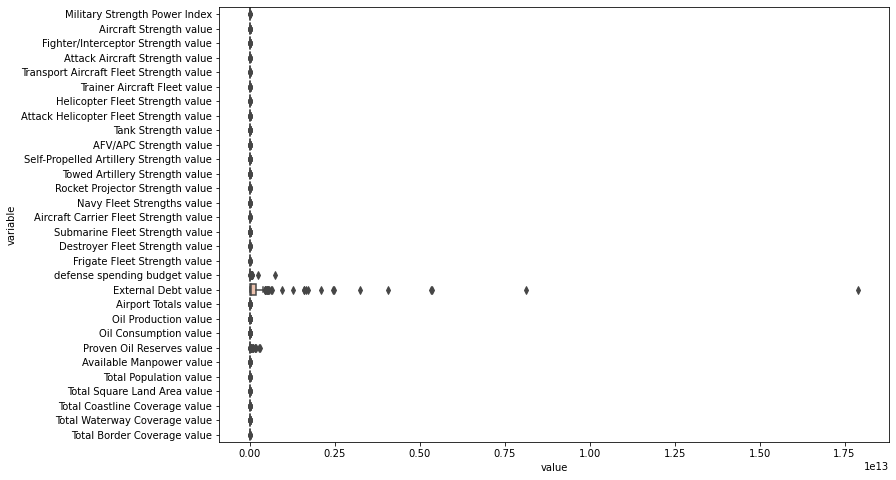

In [52]:
#Country vs Numeric columns
fig= plt.subplots(figsize =(12,8))
sns.boxplot( x='value' ,y ='variable',data = pd.melt(df.select_dtypes("number")), palette="coolwarm");

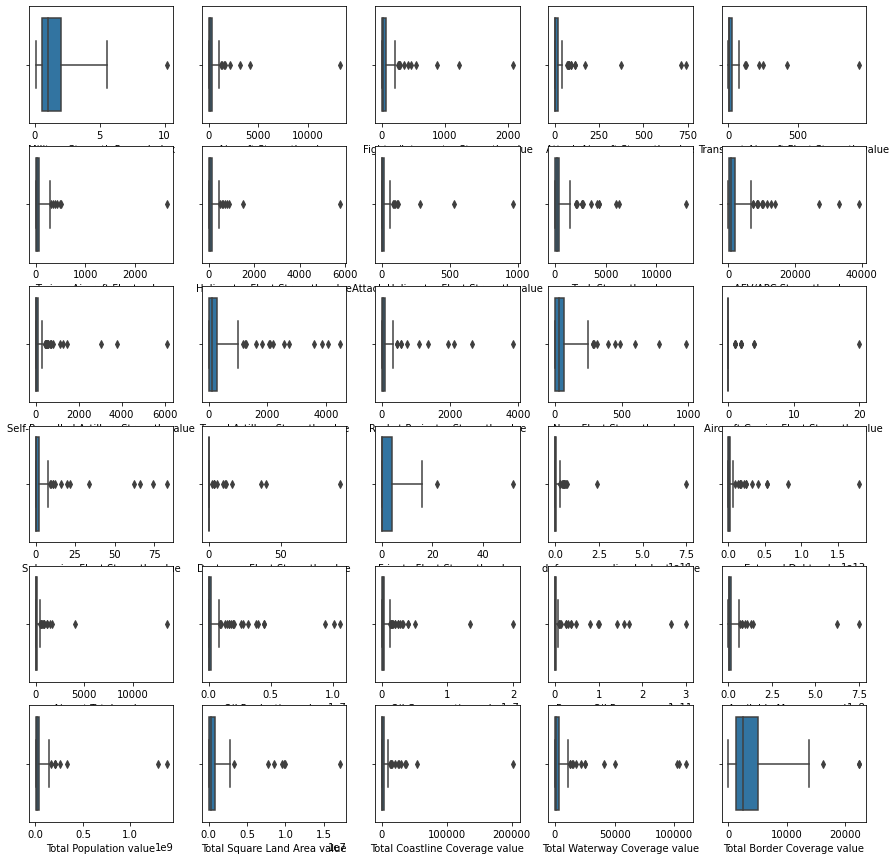

In [53]:
index = 0                          # let's check outliers numeric_features
plt.figure(figsize=(15,15))
for  col in  df.select_dtypes(include='number'):
    index += 1
    plt.subplot(6,5,index)
    sns.boxplot(x=col, data=df, whis=3)

In [55]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model.fit_predict(X_scaled)

df["cluster_1"] = model4.labels_

fig = px.scatter_3d(x=df["Aircraft Strength value"],
                    y=df["defense spending budget value"],
                    z=df["External Debt value"],
                    color=df["cluster_hr"],
                    labels = {"x":"Aircraft Strength value",
                              "y": "defense spending budget value",
                              "z": "External Debt value"},
                    hover_name=df["Country"])

fig.show()

plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df["cluster_hr"])

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

NameError: name 'X_scaled' is not defined

<AxesSubplot:>

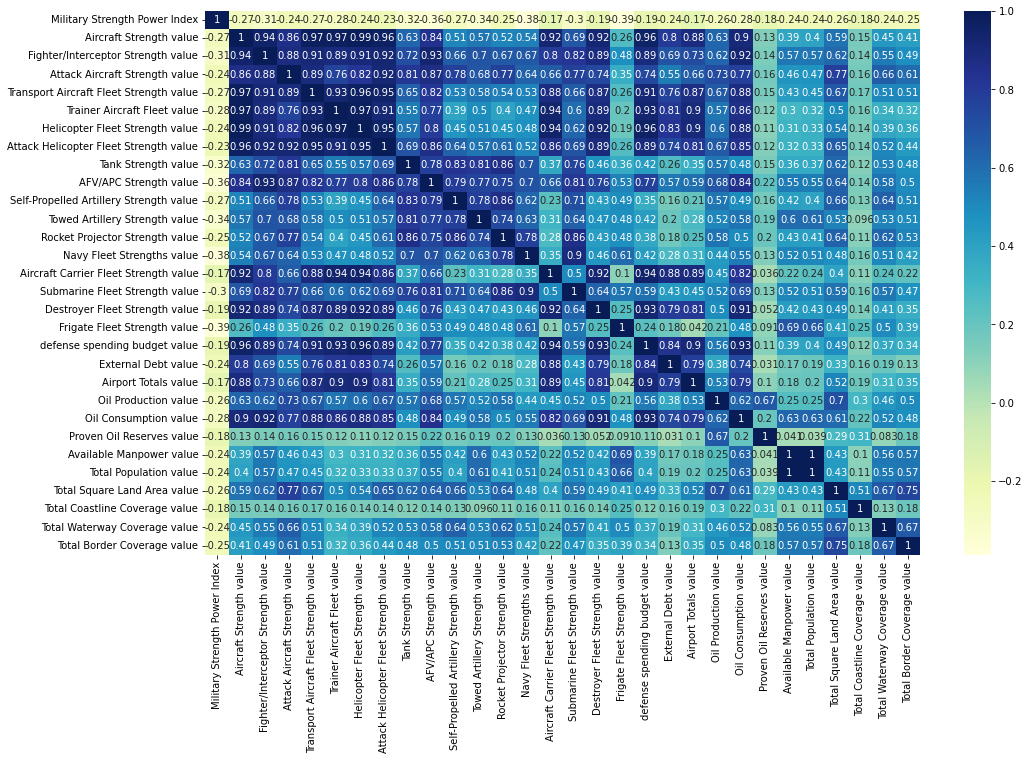

In [56]:
fig= plt.subplots(figsize =(16,10))
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")

In [ ]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9)) & (dfCorr !=1.000)]
plt.figure(figsize=(15,9))
sns.heatmap(filteredDf, annot=True)
plt.show();

In [ ]:
df_temp = df.corr()         # ıt finds high correlation features between 0.9 and 1 .

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)

In [ ]:
my_dict = {"feature":feature, "collinear":collinear} # ıt shows high correlation features..
df_col = pd.DataFrame(my_dict)
df_col

In [ ]:
df_col.value_counts("feature")   # most effective features....

In [ ]:
sns.barplot(x= "Country" , y ="Aircraft Strength value",data=df)

In [ ]:
fig = px.bar(df,x= "Country" , y =df["Aircraft Strength value"])
fig.show()

In [ ]:
fig = px.bar(df,x= "Country" , y =df['Tank Strength value'])
fig.show()

In [ ]:
fig = px.bar(df,x= "Country" , y =df['Fighter/Interceptor Strength value'])
fig.show()

In [ ]:
fig = px.bar(df,x= "Country" , y =df['Airport Totals value'])
fig.show()

In [ ]:
fig = px.bar(df,x= "Country" , y =df['Helicopter Fleet Strength value'])
fig.show()

##Descriptive statistics

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
df.describe().T

# Data Preprocessing

In [1]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

In [2]:
X = df.drop(["Country"], axis=1)

NameError: name 'df' is not defined

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [3]:
#!pip install pyclustertend  # important detail.

In [4]:
from pyclustertend import hopkins    # dont forget run "pip install pyclustertend"

In [5]:
hopkins(X, X.shape[0])   # best score is less than 0.5

NameError: name 'X' is not defined

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [ ]:
ssd

In [6]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

NameError: name 'plt' is not defined

In [7]:
#pip install -U yellowbrick

In [8]:
from yellowbrick.cluster import KElbowVisualizer

In [9]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

NameError: name 'KMeans' is not defined

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
silhouette_score(X, kmeans.labels_)

NameError: name 'X' is not defined

In [12]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

NameError: name 'KMeans' is not defined

In [13]:
#silhouette score  1 E YAKIN OLMASI İSTENİLEN DURUM

### Model Building and label visualisation

In [14]:
model = KMeans(n_clusters=4)
model.fit(X)

NameError: name 'KMeans' is not defined

In [15]:
model.inertia_

NameError: name 'model' is not defined

In [16]:
df["cluster"] = model.labels_

NameError: name 'model' is not defined

In [130]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["Aircraft Strength value"], 
                df["Navy Fleet Strengths value"], hue= df.cluster,palette= "viridis");

AttributeError: 'DataFrame' object has no attribute 'cluster'

<Figure size 720x360 with 0 Axes>

AttributeError: 'DataFrame' object has no attribute 'cluster'

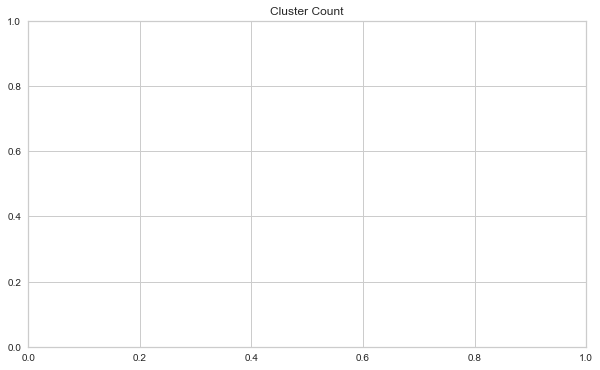

In [131]:
plt.figure(figsize=(10,6))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster)
for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',ha='center',  va='center', 
        fontsize=11, color='black',xytext=(0,7), 
        textcoords='offset points',
        clip_on=True)
plt.show();

In [132]:
df

Country  Military Strength Power Index  Aircraft Strength value  Fighter/Interceptor Strength value  Attack Aircraft Strength value  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  Tank Strength value  AFV/APC Strength value  Self-Propelled Artillery Strength value  Towed Artillery Strength value  Rocket Projector Strength value  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  Destroyer Fleet Strength value  Frigate Fleet Strength value  defense spending budget value  External Debt value  Airport Totals value  Oil Production value  Oil Consumption value  Proven Oil Reserves value  Available Manpower value  Total Population value  Total Square Land Area value  Total Coastline Coverage value  Total Waterway Coverage value  Total Border Coverage value
0                         Afghanistan                          1.344                  260.000                               0.000                          25.000                                   30.000                         0.000                          187.000                                   0.000                0.000                1062.000                                    0.000                         176.000                           50.000                       0.000                                  0.000                           0.000                           0.000                         0.000                12000000000.000       2840000000.000                43.000                 0.000               5500.000                      0.000              14325743.000            34940837.000                    652230.000                           0.000                       1200.000                     5987.000
1                             Albania                          2.314                   19.000                               0.000                           0.000                                    0.000                         0.000                           19.000                                   0.000                0.000                 467.000                                    0.000                           0.000                            0.000                      38.000                                  0.000                           0.000                           0.000                         0.000                  250000000.000       9505000000.000                 4.000             16000.000              42500.000              168300000.000               1519438.000             3057220.000                     28748.000                         362.000                         41.000                      691.000
2                             Algeria                          0.466                  551.000                             103.000                          22.000                                   59.000                        87.000                          257.000                                  45.000              880.000                7361.000                                  320.000                         240.000                          316.000                     201.000                                  0.000                           6.000                           0.000                         5.000                13000000000.000       6260000000.000               157.000           1306000.000             325000.000            12200000000.000              20741263.000            41657488.000                   2381741.000                         998.000                          0.000                     6734.000
3                              Angola                          0.838                  295.000                              72.000                          18.000                                   30.000                        47.000                          126.000                     

In [133]:
df[df["cluster"] == 0]

KeyError: 'cluster'

In [134]:
df[df["cluster"] == 1]

KeyError: 'cluster'

In [135]:
df[df["cluster"] == 2]

KeyError: 'cluster'

In [136]:
df[df["cluster"] == 3]

KeyError: 'cluster'

### Evaluate 

In [137]:
df.groupby("cluster").mean().T

KeyError: 'cluster'

In [138]:
#pip install plotly

In [139]:
import plotly.express as px

In [140]:
fig= px.line(df.groupby("cluster").mean().T)
fig.show()

KeyError: 'cluster'

## Hierarchical Clustering

In [141]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [58]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

NameError: name 'linkage' is not defined

NameError: name 'dendrogram' is not defined

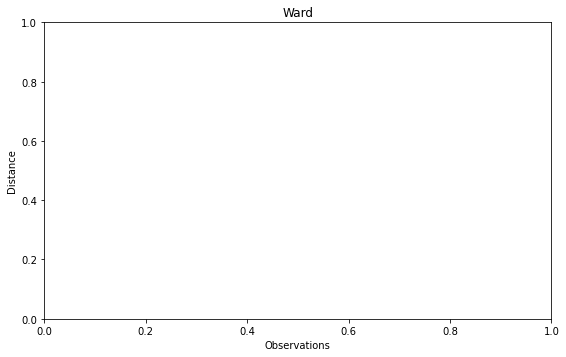

In [59]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

# Model building and label visualization


In [103]:
from sklearn.cluster import AgglomerativeClustering

In [104]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [105]:
df["cluster_1"] = model1.labels_

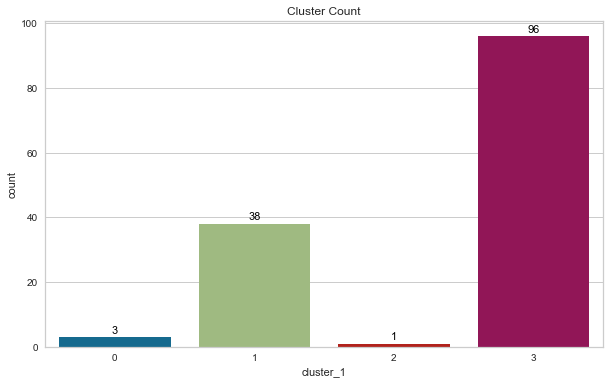

In [106]:
plt.figure(figsize=(10,6))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                  
    )
plt.show();

In [107]:
df[df["cluster"] == 0]

Country  Military Strength Power Index  Aircraft Strength value  \
0    Afghanistan                         1.3444                      260   
1        Albania                         2.3137                       19   
3         Angola                         0.8379                      295   
4      Argentina                         0.6521                      227   
5        Armenia                         2.1251                       64   
..           ...                            ...                      ...   
132   Uzbekistan                         0.8086                      185   
133    Venezuela                         0.6449                      260   
135        Yemen                         1.2412                      169   
136       Zambia                         1.6464                      108   
137     Zimbabwe                         1.7577                       90   

     Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
0                                     0                              25   
1                                     0                               0   
3                                    72                              18   
4                                    24                               7   
5                                     0                               9   
..                                  ...                             ...   
132                                  66                              20   
133                                  38                               0   
135                                  77                               0   
136                                  18                               0   
137                                  10                               0   

     Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
0                                         30                             0   
1                                          0                             0   
3                                         30                            47   
4                                          9                            64   
5                                          3                            13   
..                                       ...                           ...   
132                                       18                             2   
133                                       52                            82   
135                                        8                            21   
136                                       11                            52   
137                                       14                            38   

     Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
0                                187                                       0   
1                                 19                                       0   
3                                126                                      15   
4                                100                                       0   
5                                 37                                      20   
..                               ...                                     ...   
132                               79                                      25   
133                               86                                      10   
135                               61                                      14   
136                               27                                       0   
137                               28                                       6   

     Tank Strength value  ...  Oil Consumption value  \
0                      0  ...                 5500.0   
1                      0  ...                42500.0   
3                    379  ...                82300.0   
4                    370  ...               685000.0   
5                

In [108]:
df[df["cluster"] == 1]

Country  Military Strength Power Index  Aircraft Strength value  \
130  United States                         0.0606                    13264   

     Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
130                                2085                             715   

     Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
130                                      945                          2643   

     Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
130                             5768                                     967   

     Tank Strength value  ...  Oil Consumption value  \
130                 6289  ...             20000000.0   

     Proven Oil Reserves value  Available Manpower value  \
130               3.652000e+10               144872845.0   

     Total Population value  Total Square Land Area value  \
130             329256465.0                     9826675.0   

     Total Coastline Coverage value  Total Waterway Coverage value  \
130                         19924.0                        41009.0   

     Total Border Coverage value  cluster  cluster_1  
130                        12048        1          2  

[1 rows x 33 columns]

In [109]:
df[df["cluster"] == 2]

Country  Military Strength Power Index  Aircraft Strength value  \
26    China                         0.0691                     3210   
101  Russia                         0.0681                     4163   

     Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
26                                 1232                             371   
101                                 873                             742   

     Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
26                                       224                           314   
101                                      424                           497   

     Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
26                               911                                     281   
101                             1522                                     531   

     Tank Strength value  ...  Oil Consumption value  \
26                  3500  ...             13500000.0   
101                12950  ...              3225000.0   

     Proven Oil Reserves value  Available Manpower value  \
26                2.562000e+10               752855402.0   
101               8.000000e+10                69640160.0   

     Total Population value  Total Square Land Area value  \
26             1.384689e+09                     9596961.0   
101            1.421228e+08                    17098242.0   

     Total Coastline Coverage value  Total Waterway Coverage value  \
26                          14500.0                       110000.0   
101                         37653.0                       102000.0   

     Total Border Coverage value  cluster  cluster_1  
26                         22457        2          0  
101                        22408        2          0  

[2 rows x 33 columns]

In [110]:
df[df["cluster"] == 3]

Country  Military Strength Power Index  Aircraft Strength value  \
2           Algeria                         0.4659                      551   
6         Australia                         0.3225                      464   
17           Brazil                         0.1988                      715   
22           Canada                         0.3712                      385   
27         Colombia                         0.6045                      469   
35            Egypt                         0.1872                     1054   
40           France                         0.1702                     1229   
43          Germany                         0.2186                      712   
45           Greece                         0.5311                      566   
49            India                         0.0953                     2123   
50        Indonesia                         0.2544                      462   
51             Iran                         0.2191                      509   
55            Italy                         0.2111                      860   
57            Japan                         0.1501                     1561   
73           Mexico                         0.6065                      484   
87      North Korea                         0.3718                      949   
91         Pakistan                         0.2364                     1372   
102    Saudi Arabia                         0.3034                      879   
110     South Korea                         0.1509                     1649   
118           Syria                         0.8241                      456   
119          Taiwan                         0.4008                      744   
122        Thailand                         0.3571                      570   
124          Turkey                         0.2098                     1055   
127         Ukraine                         0.4457                      297   
129  United Kingdom                         0.1717                      733   
134         Vietnam                         0.3559                      293   

     Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
2                                   103                              22   
6                                    82                               6   
17                                   43                              78   
22                                   62                               0   
27                                   21                              38   
35                                  215                              88   
40                                  269                               0   
43                                  128                              74   
45                                  187                               0   
49                                  538                             172   
50                                   41                              39   
51                                  155                              23   
55                                   99                             110   
57                                  279                              12   
73                                    3                              33   
87                                  458                             114   
91                                  356                              90   
102                                 270                              81   
110                                 414                              71   
118                                 199                              20   
119                                 289                               0   
122                                  75                              19   
124                                 206                               0   
127                                  48                              25   
129

### Evaluate 